Notebook used to investigate how mean squared error of best model performance and average model perfomance as it changes with Leaf size (more per leaf -> less overfitting)
Trees are at default depth (Max)
Utilizing entire dataset

use min_leaf_nodes

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stat
import numpy as np 
#import forestsci
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

import sys
sys.path.append("..")
import Utility.model_utils as model_utils

In [2]:
# Runtime Variables
number_trees = 64
seed = 72
accuracy_array = []

# Data Input
filename = '../Results/training_data.csv'

# If saving model, set save to True and give meaningful name
#model_name = 'RF_C_MC.sav'
#save = False 


# Control what features are used by the model
label="Labels"
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
#      'moments_hu-3',
#      'moments_hu-4',
#      'moments_hu-5',
#      'moments_hu-6',
#    'eccentricity'
         ]


In [3]:
import time
start_time = time.time()

best_f1 = 0
best_model = None
best_model_test_f1_arr = []
best_model_train_f1_arr = []
avg_model_test_f1_arr = []
avg_model_train_f1_arr = []
all_model_test_f1_arr = []
all_model_train_f1_arr = []

min_leaf_arr = [1,2,3,4,5,6,7,8,9,10,15,20,30,60]
seeds_arr = np.arange(50)

for min_leaf in min_leaf_arr:
    model_test_f1_arr = []
    model_train_f1_arr = []
    for seed in seeds_arr: # 50 runs 
        df = pd.read_csv(filename) # Read in data w/ features

        # Modify Data (Remove illegal data OR set different runtime)
        # Change how data is grouped
        df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True) # Group Poorly Segmented and Incomplete as a single class
        df['Labels'].replace('Multiple Crystal', 'Crystal', inplace=True) # Group Multiple Crystal and Crystal as a single class
        #df = df[df['Labels'] != "Incomplete"] # Remove any data labeled as "Incomplete"

        # Missed Labels: Purge any bad data that the model cannot run on
        df['Labels'].replace('', np.nan, inplace=True) 
        df.dropna(subset=['Labels'], inplace=True)
        # Numerical errors (divide by 0)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        for feature in features:
            df.dropna(subset=[feature],inplace=True)

        # Split Data
        X=df[features]
        y=df[label]

        #print(Counter(y))

        # Encode
        ohe = OneHotEncoder(sparse=False)
        y = ohe.fit_transform(df[[label]])

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

        # Create RandomForestRegressor
        rfr=RandomForestRegressor(n_estimators = number_trees,min_samples_leaf=min_leaf,oob_score=False)
        rfr.fit(X_train,y_train)

        # Accuracy Checks
        y_pred_test = rfr.predict(X_test)
        y_pred_test = np.round(y_pred_test)
        test_accuracy = metrics.f1_score(y_test,y_pred_test,average='micro')
        model_test_f1_arr.append(test_accuracy)
        
        y_pred_train = rfr.predict(X_train)
        y_pred_train = np.round(y_pred_train)
        train_accuracy = metrics.f1_score(y_train,y_pred_train,average='micro')
        model_train_f1_arr.append(train_accuracy)
        
        #accuracy = metrics.accuracy_score(y_test,y_pred)
        if seed % 10 == 0:
            print(f'{seed} Seed Completed...')

    best_index = np.argmax(model_test_f1_arr)    
    best_model_test_f1_arr.append(model_test_f1_arr[best_index])
    best_model_train_f1_arr.append(model_train_f1_arr[best_index])
    avg_model_test_f1_arr.append(np.mean(model_test_f1_arr))
    avg_model_train_f1_arr.append(np.mean(model_train_f1_arr))
    all_model_test_f1_arr.append(model_test_f1_arr)
    all_model_train_f1_arr.append(model_train_f1_arr)
    elapsed_time = time.time() - start_time

    print(f'Leaf Size {number_trees} evaluated, time elapsed: {elapsed_time}')

0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Leaf Size 64 evaluated, time elapsed: 25.02581524848938
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Leaf Size 64 evaluated, time elapsed: 48.795074224472046
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Leaf Size 64 evaluated, time elapsed: 72.2869873046875
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Leaf Size 64 evaluated, time elapsed: 103.15871691703796
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Leaf Size 64 evaluated, time elapsed: 127.44287705421448
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Leaf Size 64 evaluated, time elapsed: 147.76253247261047
0 Seed Completed...
10 Seed Completed

In [4]:
print(f'Best Model F1: {best_f1}')
#print(best_model.oob_score_)
#print(best_model.score(X_train,y_train))
print(ohe)
print(ohe.feature_names_in_)
ohe.get_feature_names_out(['Labels'])

Best Model F1: 0
OneHotEncoder(sparse=False)
['Labels']


array(['Labels_Crystal', 'Labels_Incomplete', 'Labels_Multiple Crystal',
       'Labels_Poorly Segmented'], dtype=object)

[0.6683544303797468, 0.6887755102040817, 0.6532663316582915, 0.6498740554156172, 0.6532663316582915, 0.6666666666666667, 0.6529562982005142, 0.6516290726817042, 0.6329113924050633, 0.654911838790932, 0.6426735218508997, 0.6580976863753213, 0.6541554959785524, 0.6138107416879796]


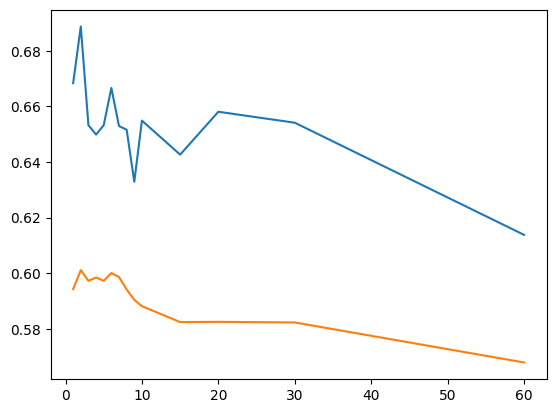

In [5]:
plt.plot(min_leaf_arr,best_model_test_f1_arr)
#plt.plot(min_leaf_arr,best_model_train_f1_arr)
plt.plot(min_leaf_arr,avg_model_test_f1_arr)
#plt.plot(min_leaf_arr,avg_model_train_f1_arr)
#plt.plot(min_leaf_arr,[min(arr) for arr in all_model_test_f1_arr])
print(best_model_test_f1_arr)

In [ ]:
# Feature Importances

from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=2)
elapsed_time = time.time() - start_time

print(f'Time elapsed: {elapsed_time}')
forest_importances = pd.Series(result.importances_mean, index=features)